In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Rice Type Classification

In [2]:
#load dataset
df_rice = pd.read_csv('riceClassification.csv')

In [3]:
## show head of dataset
df_rice.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


## Exploratory Data Analysis (EDA) 

In [4]:
#check total rows and columns of dataset
df_rice.shape

(18185, 12)

In [5]:
#check missing value
df_rice.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [6]:
#describe dataset
df_rice.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [7]:
#check summary of dataset
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


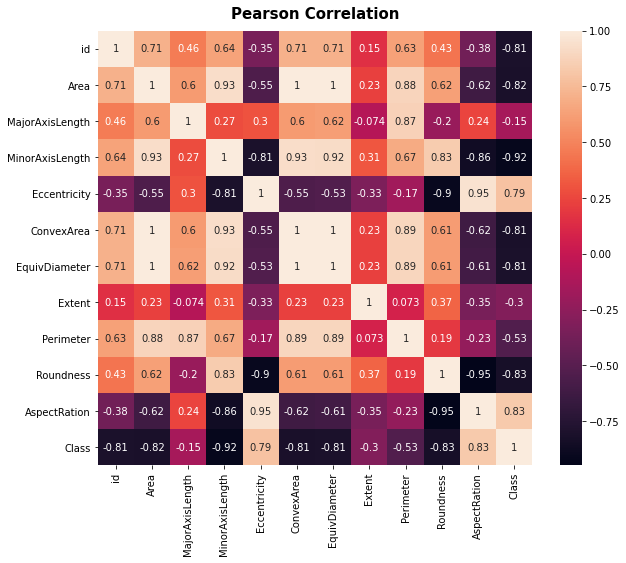

In [8]:
#visualize correlation of each variables using pearson correlation
plt.figure(figsize = (10,8))
sns.heatmap(df_rice.corr(), annot = True, square = True)
plt.title('Pearson Correlation', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

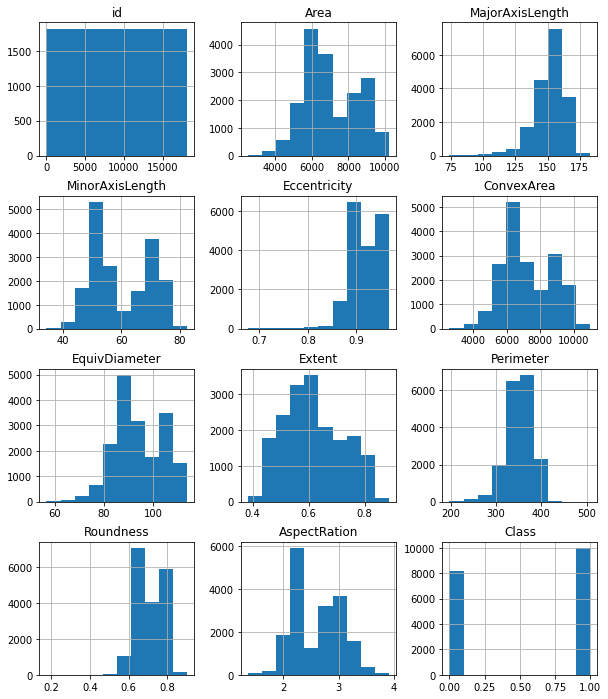

In [9]:
#visualize all distribution of variables
df_rice.hist(figsize = (10,12))
plt.show()

## Linear Discriminant Analysis (LDA)

In [10]:
#indexing id column
df_rice = df_rice.set_index('id')

#split data
X = df_rice[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 
                'Perimeter', 'Roundness', 'AspectRation']]
y = df_rice['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14548, 10)
(14548,)
(3637, 10)
(3637,)


In [11]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Training :\n', X_train)
print('\nTesting :\n', X_test)

Training :
 [[-0.68870384 -0.16563724 -0.78914975 ... -0.21890087 -1.07403728
   0.65752908]
 [ 0.69650832 -0.08440369  0.91083611 ...  0.28963571  1.07899228
  -0.95485752]
 [-0.24652774  1.10723198 -0.71159527 ...  0.59852333 -1.37954315
   1.24735544]
 ...
 [ 0.16494168 -1.05758608  0.77617485 ... -0.44674154  1.34484038
  -1.26393456]
 [ 1.16188501  0.11674823  1.3740283  ...  0.69059593  1.27401291
  -1.19522631]
 [-1.27417774 -1.2634969  -1.09203583 ... -1.60864075 -0.08900725
   0.43163233]]

Testing :
 [[ 1.15779079  0.30856743  1.26921372 ...  0.86622594  0.94442106
  -1.05041786]
 [ 1.87632695  0.83656854  1.84192364 ...  1.62326355  0.93142223
  -1.22123249]
 [ 0.58801141 -0.36244362  0.91363097 ...  0.14972878  1.11507097
  -1.07164043]
 ...
 [-0.46215682  1.1751477  -1.02237126 ...  0.37414302 -1.49172655
   1.74247149]
 [-0.54472366  0.18801964 -0.74008588 ... -0.25011192 -0.69085284
   0.78722361]
 [ 1.8681385   1.24538992  1.56680118 ...  1.59568248  0.96409507
  -0.892

In [12]:
#initialize the LDA
lda = LinearDiscriminantAnalysis()

# fitting the LDA model
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)
print('Training : ', X_train, sep = '\n')
print('\nTesting : ', X_test, sep = '\n')

Training : 
[[ 2.21067072]
 [-3.08158219]
 [ 2.88322028]
 ...
 [-3.23008217]
 [-4.36930277]
 [ 1.85831661]]

Testing : 
[[-3.54442438]
 [-4.71875449]
 [-3.24478142]
 ...
 [ 3.15343522]
 [ 2.11250838]
 [-3.55038015]]


## Support Vector Machine

In [13]:
#build model
svm = SVC(probability = True)
%time svm.fit(X_train, y_train)
print('Training Accuracy Score : {}'.format(svm.score(X_train, y_train)))
print('Testing Accuracy Score : {}'.format(svm.score(X_test, y_test)))

Wall time: 7.85 s
Training Accuracy Score : 0.9894143524883146
Testing Accuracy Score : 0.9862524058289799


In [14]:
#calculate prediction probability
prob_train = np.squeeze(svm.predict_proba(X_train)[:, 1].reshape(1, -1))
prob_test = np.squeeze(svm.predict_proba(X_test)[:, 1].reshape(1, -1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [9.93830656e-01 8.27565473e-04 9.83748841e-01 ... 1.35818929e-03
 1.79218705e-02 9.96206061e-01]

Probability of Testing Set : 
 [0.0036015  0.02236336 0.00142537 ... 0.98010125 0.99470284 0.00366326]


In [15]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.9932826190894365
Training of Area Under the Curve (AUC) : 0.9946330406576067


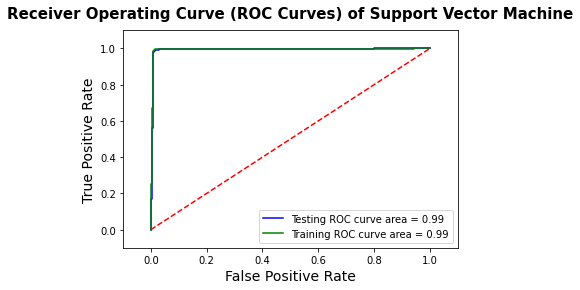

In [16]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Support Vector Machine', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [17]:
#prediction
y_pred = svm.predict(X_test)
print(y_pred)

[0 0 0 ... 1 1 0]


In [18]:
#check MSE & RMSE
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.013747594171020072
Root Mean Squared Error : 0.1172501350575771


         Gonen  Jasmine
Gonen     1621       32
Jasmine     18     1966


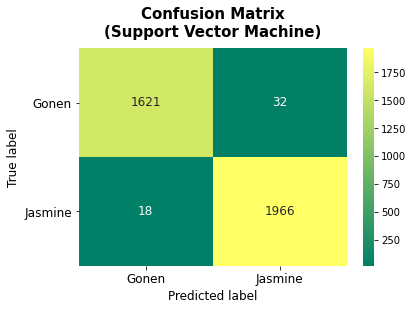

In [19]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Gonen', 'Jasmine'), ('Gonen', 'Jasmine'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 12}, fmt = 'd', cmap = 'summer')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, fontsize = 12)

plt.title('Confusion Matrix\n(Support Vector Machine)', fontsize = 15, pad = 12, fontweight = 'bold')
plt.ylabel('True label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12)
plt.show()

In [20]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Support Vector Machine : \n')
print(report)

Classification Report of Support Vector Machine : 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1653
           1       0.98      0.99      0.99      1984

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



# Classification in Asteroseismology 

In [21]:
#load dataset
df_asteroseismology = pd.read_csv('classification_in_asteroseismology.csv')

In [22]:
#show head of dataset
df_asteroseismology.head()

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275


## Exploratory Data Analysis (EDA)

In [23]:
#check total rows and columns
df_asteroseismology.shape

(1001, 4)

In [24]:
#check missing value
df_asteroseismology.isnull().sum()

POP        0
Dnu        0
numax      0
epsilon    0
dtype: int64

In [25]:
#describe dataset
df_asteroseismology.describe()

,POP,Dnu,numax,epsilon
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.712288,5.774810,58.441771,0.610774
std,0.452923,2.998103,43.425561,0.342518
min,0.000000,2.500080,17.979780,0.005000
25%,0.000000,4.073160,32.924350,0.220000
50%,1.000000,4.308740,38.293160,0.815000
75%,1.000000,6.580340,70.140830,0.890000
max,1.000000,17.699430,239.648480,1.000000


In [26]:
#check summary of dataset
df_asteroseismology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   POP      1001 non-null   int64  
 1   Dnu      1001 non-null   float64
 2   numax    1001 non-null   float64
 3   epsilon  1001 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


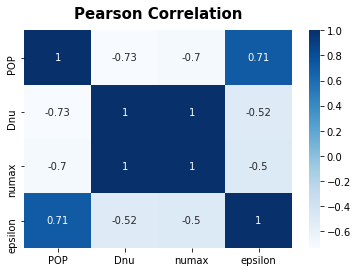

In [27]:
#visualize correlation of each variables using pearson correlation
sns.heatmap(df_asteroseismology.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson Correlation', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

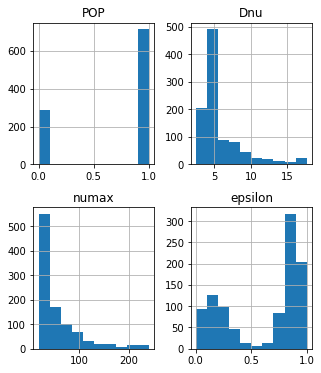

In [28]:
#visualize all distribution of variables
df_asteroseismology.hist(figsize = (5,6))
plt.show()

## Linear Discriminant Analysis (LDA)

In [29]:
#split data
X = df_asteroseismology[['Dnu', 'numax', 'epsilon']]
y = df_asteroseismology['POP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 3)
(800,)
(201, 3)
(201,)


In [30]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Training :\n', X_train)
print('\nTesting :\n', X_test)

Training :
 [[-0.05266301 -0.11291891 -1.33930598]
 [-0.5004378  -0.5976292   0.49768145]
 [ 2.33467677  2.44991295 -0.93108655]
 ...
 [-0.4767766  -0.50371584  0.39562659]
 [ 0.88663964  1.00793843  1.08085206]
 [-0.49136547 -0.4658694   0.71637042]]

Testing :
 [[-0.6748981  -0.64087529  0.94963867]
 [ 0.67228006  0.54973107 -1.29556819]
 [-0.43283049 -0.65741958  0.32273026]
 [ 0.0357033   0.02716919 -1.5434157 ]
 [-0.50892088 -0.52013706  0.77468749]
 [-0.65000084 -0.73447395  1.09543132]
 [-0.23001535 -0.19503999  0.92048014]
 [ 0.34876806  0.33174301 -1.36846451]
 [ 1.25075869  1.28644032 -1.07687921]
 [-0.58421207 -0.63531326  1.05169353]
 [-0.55490564 -0.52782988  0.83300455]
 [-0.47400647 -0.28730804  1.06627279]
 [-0.56227796 -0.57255422  0.55599851]
 [ 1.48429919  1.39012676 -1.06229994]
 [-0.52819662 -0.51580971  0.54141924]
 [-0.76879789 -0.63372575  0.86216308]
 [ 0.2000347   0.11010403 -1.33930598]
 [ 0.70579586  0.49395076 -1.13519627]
 [-0.4469351  -0.40707387  0.80384

In [31]:
#initialize the LDA
lda = LinearDiscriminantAnalysis()

# fitting the LDA model
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)
print('Training : ', X_train, sep = '\n')
print('\nTesting : ', X_test, sep = '\n')

Training : 
[[-1.43017623]
 [ 0.59101013]
 [-3.08908775]
 [ 1.89415744]
 [ 1.23622004]
 [-3.87276404]
 [-0.02856582]
 [ 1.9634035 ]
 [-2.34832322]
 [ 1.86262664]
 [ 1.91272643]
 [-4.16147536]
 [-0.57478852]
 [ 0.90582485]
 [-4.11988325]
 [-2.70542947]
 [-1.19789995]
 [-0.26165153]
 [-2.78419009]
 [ 1.64452887]
 [-2.79180807]
 [ 1.35405007]
 [ 0.92837365]
 [-4.08271268]
 [ 1.49855674]
 [ 1.57718052]
 [ 0.90113153]
 [-3.06917789]
 [-1.87545114]
 [ 1.31975629]
 [-2.45245524]
 [-3.08718806]
 [ 1.62435561]
 [ 1.35806375]
 [ 1.22076863]
 [ 1.31804802]
 [-2.92410161]
 [ 1.32736811]
 [ 0.88188994]
 [-5.13945705]
 [ 0.88753469]
 [-2.52910459]
 [ 1.12321585]
 [ 1.12604983]
 [ 1.4480112 ]
 [ 1.77486635]
 [ 3.08986628]
 [-2.06979721]
 [ 1.08319919]
 [ 0.86722323]
 [-2.4237813 ]
 [-2.20465009]
 [ 1.52413057]
 [ 1.38574023]
 [ 0.84792768]
 [ 0.90800863]
 [ 1.08871059]
 [ 1.83803889]
 [-1.76699741]
 [-3.38348046]
 [-0.73765218]
 [ 1.09735917]
 [ 1.28136888]
 [ 1.19243342]
 [-4.9807135 ]
 [-2.40659658

## Gaussian Naive Bayes

In [32]:
#build model
gnb = GaussianNB()
%time gnb.fit(X_train, y_train)
print('Training Accuracy Score : {}'.format(gnb.score(X_train, y_train)))
print('Testing Accuracy Score : {}'.format(gnb.score(X_test, y_test)))

Wall time: 4.02 ms
Training Accuracy Score : 0.9425
Testing Accuracy Score : 0.9751243781094527


In [33]:
#calculate prediction probability
prob_train = np.squeeze(gnb.predict_proba(X_train)[:, 1].reshape(1, -1))
prob_test = np.squeeze(gnb.predict_proba(X_test)[:, 1].reshape(1, -1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [9.47817063e-02 9.81188654e-01 7.95851585e-05 9.98468074e-01
 9.95272416e-01 1.39174747e-06 9.12687270e-01 9.98616071e-01
 2.47418087e-03 9.98393808e-01 9.98509724e-01 2.82001080e-07
 6.70928057e-01 9.90720442e-01 3.56167158e-07 4.94943701e-04
 1.97661926e-01 8.42152648e-01 3.42928160e-04 9.97730051e-01
 3.30895854e-04 9.96218021e-01 9.91157709e-01 4.38372178e-07
 9.97086936e-01 9.97457714e-01 9.90626364e-01 8.77206572e-05
 1.79889109e-02 9.95968066e-01 1.56203773e-03 8.03286238e-05
 9.97652442e-01 9.96246051e-01 9.95128694e-01 9.95955109e-01
 1.76825613e-04 9.96025204e-01 9.90229171e-01 8.28029679e-10
 9.90347640e-01 1.10794426e-03 9.94093386e-01 9.94126879e-01
 9.96813504e-01 9.98161080e-01 9.99580808e-01 8.13710025e-03
 9.93595956e-01 9.89913568e-01 1.77431190e-03 4.60634167e-03
 9.97214391e-01 9.96432715e-01 9.89480616e-01 9.90763849e-01
 9.93667271e-01 9.98332625e-01 2.75777755e-02 1.82841222e-05
 5.46268643e-01 9.93777332e-01 9.95664602e-01 9.94851

In [34]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.9828121269992839
Training of Area Under the Curve (AUC) : 0.9772329246935202


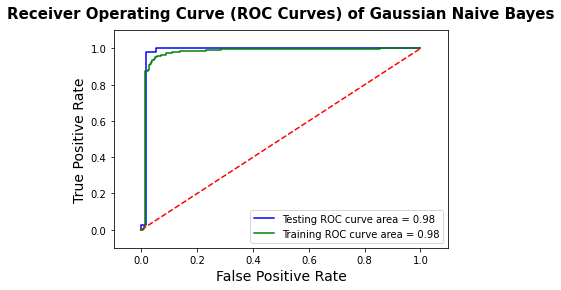

In [35]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Gaussian Naive Bayes', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [36]:
#prediction
y_pred = gnb.predict(X_test)
print(y_pred)

[1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1]


In [37]:
#check MSE & RMSE
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.024875621890547265
Root Mean Squared Error : 0.15772007446912795


     RGB  Heb
RGB   58    1
HeB    4  138


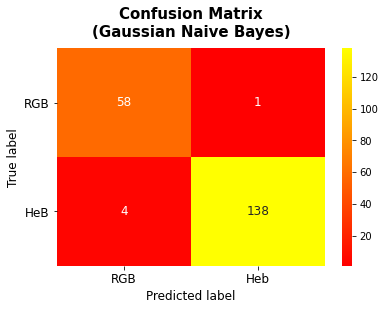

In [38]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('RGB', 'HeB'), ('RGB', 'Heb'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 12}, fmt = 'd', cmap = 'autumn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, fontsize = 12)

plt.title('Confusion Matrix\n(Gaussian Naive Bayes)', fontsize = 15, pad = 12, fontweight = 'bold')
plt.ylabel('True label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12)
plt.show()

In [39]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Gaussian Naive Bayes : \n')
print(report)

Classification Report of Gaussian Naive Bayes : 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.99      0.97      0.98       142

    accuracy                           0.98       201
   macro avg       0.96      0.98      0.97       201
weighted avg       0.98      0.98      0.98       201

